# adding grids to images

class:  buses
path:  /buses/c3bba173-fa56-4e22-97c3-affcf54c062a.jpg


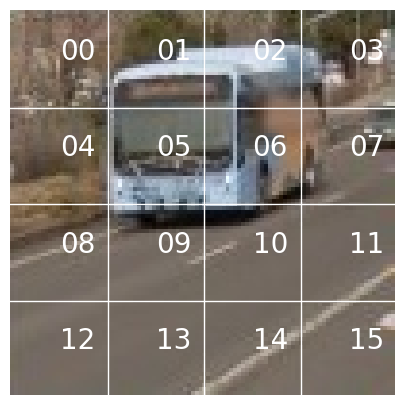

In [225]:
import matplotlib.pyplot as plt
from pathlib import Path
import random


root = Path.cwd() / "full captcha dataset"
files = [f for f in root.rglob("*.jpg")]
random_file = files[random.randint(0, len(files))]
cls = random_file.parts[-2]
print("class: ", cls)
print("path: ", str(random_file).replace(str(root), ""))

img = plt.imread(random_file)
height, width, _ = img.shape
cell_height = height // 4
cell_width = width // 4

plt.figure(figsize=(5, 5))
for i in range(1, 5):
    line_width = 1
    plt.axhline(cell_height * i, color='white', linewidth=line_width)
    plt.axvline(cell_width * i, color='white', linewidth=line_width)
    x_offset = cell_width * (i - 0.5)
    plt.text(x_offset, cell_height * 0.5, f"{i-1}".zfill(2), color='white', fontsize=20)
    plt.text(x_offset, cell_height * 1.5, f"{i+3}".zfill(2), color='white', fontsize=20)
    plt.text(x_offset, cell_height * 2.5, f"{i+7}".zfill(2), color='white', fontsize=20)
    plt.text(x_offset, cell_height * 3.5, f"{i+11}".zfill(2), color='white', fontsize=20)
plt.axis('off')
plt.imshow(img)
plt.show()


# manual data labeling

manually determine ground truth for segmentation task (there is no ground truth in the dataset, we can't use the models we want to benchmark to generate it because we don't know which models were used by google)

In [275]:
labels ="""
path:  /traffic lights/0de6785e-a843-4c93-a844-283496231953.jpg -> 01,02,05,06,09,10,13,14
path:  /hydrants/c270d88a-c12e-42a9-bad0-2de669580a37.jpg -> 06,07,10,11,14
path:  /buses/bed09b2b-0280-4020-9086-68730216f5b1.jpg -> 08,09,10,12,13,14,15
path:  /buses/44e3cade-da8e-475f-ac31-0e0d5e5f6432.jpg -> 04,05,06,08,09,10,12,13
path:  /bicycles/048ce93f-1324-413b-896e-505ae5e4621a.jpg -> 06,08,09,10,11,12,13,14,15
path:  /hydrants/5b8405ca-ee92-4c3c-98a2-59cd50b03de9.jpg -> 02,03,06,07,10,11,14,15
path:  /traffic lights/2ca374f7-7bac-436d-ae36-5450c5e43b2f.jpg -> 02,06
path:  /hydrants/f19f0866-b727-4c81-857e-aac71f64f5ac.jpg -> 01,02,05,06,09,10,13,14
path:  /traffic lights/1236394f-aa4e-4f70-9397-d870e465810f.jpg -> 01,05,06,07
path:  /buses/d2bb814c-a2f0-4647-a43e-f8f03ecb87d1.jpg -> 04,05,06,08
path:  /buses/8251b13f-954b-4107-96ce-c25cb0f951c1.jpg -> 04,05,06,07,08,09,10,12,13,14,15
path:  /buses/e4822ffa-0019-4ff3-a3f0-fc38c0117759.jpg -> 04,05,06,07,08,09,10,11,12,13,14,15
path:  /hydrants/9ef37073-5410-4737-9161-d12053974bbb.jpg -> 02,03,06,07,10,11,14,15
path:  /palms/ca0b8ab5-d133-46bb-b806-62b71f4dfdde.jpg -> 01,05,06,09,13
path:  /traffic lights/53ed08e4-1b7b-4c8a-a07a-9e94f39053ed.jpg -> 00,01,02,03
path:  /bicycles/cfc3e142-865f-4607-9b45-8c3db50e3dc1.jpg -> 09,10,11,14
path:  /buses/9b4797c2-3c73-4e41-835b-d94336b4fb24.jpg -> 04,05,06,08,09,10,12,13,14
path:  /buses/4c62ea30-97a5-42df-b74b-fdc0285909c6.jpg -> 00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15
path:  /buses/6aeb5a23-e5d7-466c-ac76-f067ff7e8cc3.jpg -> 00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15
path:  /traffic lights/9aa3a684-6091-429e-ac1f-0322e27da031.jpg -> 02,08,06,10
path:  /hydrants/3eeba0e6-af61-4a4c-b069-43435a3acabd.jpg -> 04,05,09,13
path:  /hydrants/c777625e-a7a4-44e6-aecd-9d7e13f5ee08.jpg -> 01,02,04,05,06,07,08,09,10,11,13,14
path:  /traffic lights/f56069f4-0edd-468b-832d-a5a4575ced1b.jpg -> 02,03,06,07
path:  /hydrants/50a7e3b7-baa4-413a-8037-bddabc60142f.jpg -> 00,01,04,05,08,09,10,12,13
path:  /buses/21c3ee0c-b647-493c-bace-03ba1c9ca354.jpg -> 05,06,07,09,10,11
path:  /buses/8c9dbdfa-d4ab-483b-b291-2dd4c1d83f4d.jpg -> 04,05,06,08,09,10,11,13,14
path:  /traffic lights/abd92e67-40f8-428a-970d-6035586cf1f3.jpg -> 01,04,05,09
path:  /hydrants/c96fd61e-3669-46d8-b03d-2faf2c10f78e.jpg -> 05,06,09,10,13,14
path:  /bicycles/26ee732d-7455-4996-a795-0563effa04a6.jpg -> 01,02,05,06,09,10,13
path:  /buses/67483a36-de66-4fb8-98df-ab821ef3e084.jpg -> 05,06,07,09,10,11,13,14,15
path:  /hydrants/9e136b6e-8bca-4760-8157-0685391b2cee.jpg -> 00,01,04,05,08,09,12,13
path:  /hydrants/780a800b-2b5f-4911-8b8d-f08b6bb8a7a1.jpg -> 06,07,10,11,14,15
path:  /palms/ac32533c-877f-48b5-98ab-2f1f3a9d6139.jpg -> 01,04,05,08,09,12,13
path:  /buses/04afa6e6-bcd2-44fc-b41e-f2a42c6c2b69.jpg -> 08,09,10,12,13,14
path:  /hydrants/6f8b3283-fc02-48e4-993e-71eda19234f5.jpg -> 00,01,04,05,08,09,12,13
path:  /hydrants/4b3a993e-470e-429c-bd7f-18eced020bbc.jpg -> 01,02,05,06,09,10,13,14
path:  /buses/c725546d-d9d7-401d-8c67-a99a03dbf877.jpg -> 01,02,03,05,06,07,09,10,13
path:  /buses/325866fd-8eb3-49a2-adaa-feb893127991.jpg -> 00,01,02,03,04,05,06,07,08,09,10
path:  /bicycles/1ed978d6-2108-43bb-a14c-390646863900.jpg -> 09,10,13,14,15
path:  /hydrants/a0e795d3-4208-4a7e-9797-a1a5c3af1e5c.jpg -> 01,02,05,06,09,10
path:  /cars/8698fac8-5bc7-4277-9524-1e24b5ec1780.jpg -> 00,04,05,06,08,09,10
path:  /hydrants/0715fd0b-9d5a-4c9c-affd-c50629414ff2.jpg -> 00,01,02,04,05,06,08,09,12,13
path:  /buses/32c693fc-b7ca-4f99-9306-ee04b09bf7fe.jpg -> 00,01,04,05
path:  /buses/01763359-7047-4c96-97b2-65001776074e.jpg -> 06,07,10,11
path:  /hydrants/8d65a303-4dbe-4455-a67a-7a9c1c79cce3.jpg -> 00,01,02,04,05,06,08,09,10,12,13,14
path:  /hydrants/9ca9853e-1304-46de-a0b6-44db929379bd.jpg -> 01,02,05,06,09,10
path:  /buses/7c63accc-1724-4dbe-91b5-e0022f416cbf.jpg -> 05,06,07,09,10,11
path:  /traffic lights/af29d752-eda7-4080-9cad-38652de1958f.jpg -> 05,09,13
path:  /buses/fc5cd05d-73cd-4efa-84b9-6062c8697be0.jpg -> 00,01,02,04,05,06,08,09,10,13,14
path:  /buses/c1d9fb42-11ac-4230-995c-39765a111eeb.jpg -> 04,05,06,08,09,10
path:  /buses/b1ee591c-9e1a-46a6-8770-9e307f3881d5.jpg -> 04,05,06,07,08,09,10,11,13
path:  /hydrants/18aa53df-80eb-46c0-8ae7-c1980fc47cad.jpg -> 01,02,05,06,09,10,13,14
path:  /hydrants/7c7f6dbc-a162-4511-8ee1-2aacbc469443.jpg -> 00,01,04,05,08,09,10,12,13,14
path:  /buses/eb12e73b-77b3-4e84-83a7-b629a0569985.jpg -> 01,02,03,05,06,07
path:  /bicycles/c7c50d5b-4434-421b-8a63-4da9febca309.jpg -> 02,05,06,07,09,10
path:  /hydrants/991aed62-dbd3-4f19-820e-93aff6fa2c01.jpg -> 01,02,03,05,06,09,10,13,14
path:  /hydrants/4dd6d168-923f-4439-a4b8-7061e5f052e6.jpg -> 02,06,10
path:  /hydrants/5571913c-0e8c-4b67-a905-bcfd61c7006f.jpg -> 05,06,09,10,11,13,14
path:  /buses/ead979cd-8241-46e1-ab34-53046d8cbf5e.jpg -> 04,05,06,08,09,10,13
path:  /hydrants/bef78193-dad1-498a-96e8-ed19e6b305f8.jpg -> 01,02,05,06,09,10,13,14
path:  /traffic lights/55795472-d527-4664-86c4-0de73bb1f16f.jpg -> 01,05,02,06
path:  /buses/c4a26520-d2e1-4830-8c0b-fada4b67fe48.jpg -> 01,05,06,09,10
path:  /buses/9782b0ea-9b60-43bf-9179-b2a7d7f4dcd9.jpg -> 00,01,02,04,05,06,08,09,10,12,13,14
path:  /buses/43ae8e9b-32f5-4832-8efc-3053cd6204df.jpg -> 00,01,02,04,05,06,08
path:  /traffic lights/bc8dc3ab-715b-4310-82bd-116848c229ae.jpg -> 00,01,02,04,05,06,09,10
path:  /hydrants/6709c1be-80fc-442e-b939-19402e14cfce.jpg -> 05,09,13
path:  /hydrants/bcfae13f-b291-4b0f-8278-8d4dfa8736b8.jpg -> 01,02,05,06,09,10,11,13,14
path:  /buses/0e8835dc-4788-4764-8a8a-b8d5815e4cdc.jpg -> 04,05,06,08,09,10,13,14
path:  /buses/95b1dd13-52be-4d7d-9e15-e21c605e3fde.jpg -> 04,05,06,07,08,09,10,11
path:  /buses/ac58ed51-1513-4c71-91e3-22fcb7aab67b.jpg -> 00,01,02,03,04,05,06,07,08,09,10
path:  /hydrants/37a46c8a-22b6-48c4-be02-65c9a7f6f19e.jpg -> 01,02,05,06,09,10,13,14
path:  /hydrants/6699f0bd-8e49-4236-a134-7f385585c1ec.jpg -> 01,02,05,06,09,10,13,14
path:  /bridge/c14a14c6-4be9-4662-b3bf-f41c2b75e29d.jpg -> 04,05,06,07,08,09,10,11,12,13,14,15
path:  /buses/c0fa704e-bcc2-4019-a973-b78177448855.jpg -> 05,06,07,09,10,11
path:  /buses/02e35d01-1aa6-4462-b1ac-57827875954f.jpg -> 04,05,06,08,09,10
path:  /traffic lights/a41715cb-f09c-4aaf-bd7b-990b3d121d33.jpg -> 00,01,04,05,08,09,12,13
path:  /hydrants/14554cfb-7c34-4ff5-8c69-c6b04bce2657.jpg -> 01,04,05,08,09,12,13
path:  /bicycles/c4eaf23f-35bc-4303-b6c0-bc650ec6901b.jpg -> 02,06,07,09,10,13,14
path:  /buses/89560ed3-f6d2-4f69-afe3-34e75c435559.jpg -> 01,02,03,04,05,06,07,09,10,11
path:  /traffic lights/2a699071-6a9e-4518-9a83-b0c745300ce7.jpg -> 00,02,04,06
path:  /hydrants/c2813982-86a4-49aa-88e6-47530d3d06f7.jpg -> 04,05,08,09,12,13
path:  /hydrants/351b2cba-e20d-4b37-83e4-6dd2e638fa8d.jpg -> 02,03,05,06,07,09,10,11,14,15
path:  /hydrants/e1e12aae-24b7-4ded-b0bf-fb88cc24180b.jpg -> 06,07,10,11,13,14,15
path:  /buses/7690dd8f-a3ce-477b-9311-d57d862dcbfb.jpg -> 01,02,05,06,09,10
path:  /buses/3a9213c5-96b9-46fe-8384-ff235d653f33.jpg -> 00,01,04,05,08,09,12,13
path:  /traffic lights/c04404dd-3ec6-4f2f-a93b-efd29fb715c0.jpg -> 05,06,09,10,13,14
path:  /buses/a9a76223-1653-47ab-a609-2dffc9cbab35.jpg -> 05,06,09,10,13,14
path:  /buses/7c43327f-5160-4c47-8234-7fa52263d3f0.jpg -> 00,01,02,04,05,06,07,08,09,10,11,12,13,14,15
path:  /buses/5fb48e90-bd91-435f-9708-e613b582af03.jpg -> 04,05,06,08,09,10,12,13,14
path:  /traffic lights/fa34f6c7-3ea8-4721-b0ab-61c874ea5c1c.jpg -> 00,03,04,06,07
path:  /bicycles/bcfc536c-24a7-4d00-8acf-84a77be2fc39.jpg -> 05,06,08,09,10,11,12,13,14,15
path:  /hydrants/c147ea01-e691-4860-83b2-64ec11f62332.jpg -> 01,02,05,06,09,10
path:  /traffic lights/0744a4dc-4dbc-4214-aad4-0d1e33b646c4.jpg -> 01,03,05,06,07,09,10,11,13,14,15
path:  /traffic lights/08a1070c-9dfe-483a-af10-c699b95cda8c.jpg -> 00,01,04,05,08,09,12,13
path:  /hydrants/0eadb40a-80f5-4319-855a-3985cbd7c352.jpg -> 01,02,05,06,09,10
path:  /hydrants/d6169abd-cbf2-4832-8e8e-c4806b99e2f4.jpg -> 02,03,06,07,10,11,14,15
path:  /buses/f50ab0ce-9901-4e43-9d35-45c6351b7881.jpg -> 00,01,02,03,04,05,06,07,08,09,10,11,12,13,14
path:  /traffic lights/a5fb888d-e938-49e1-a874-9dc34ac076a2.jpg -> 07,11,15
path:  /buses/3fbcb3b9-18ed-47d9-8389-f58f7d88b4c6.jpg -> 08,09,10,11,12,13,14,15
path:  /hydrants/8a64f110-423a-492b-9a5f-d5ccf1d6cb66.jpg -> 01,02,05,06,09,10,13,14
path:  /hydrants/064db5ee-7c38-4cb1-a81f-bf1792754048.jpg -> 01,02,05,06,09,10,13,14
path:  /buses/3cbdef3a-3989-4526-b864-e46c73d14807.jpg -> 08,08,10
path:  /traffic lights/2d5855ce-ce11-4aaa-aa18-d90f62ef1027.jpg -> 05,06,09,10,13,14
path:  /hydrants/0851f35e-5374-4116-acde-1cb3e98594c9.jpg -> 01,02,05,06,09,10,13,14
path:  /hydrants/780a671d-39f8-43fa-ac78-5c460d250a49.jpg -> 01,04,05,06,09,13,14
path:  /buses/10f1f674-bafe-4883-a553-f79cad6cdfa9.jpg -> 04,05,06,08,09,10
path:  /buses/e6e6e612-0687-40d1-92b1-17faa16afdc7.jpg -> 00,01,02,04,05,06
path:  /hydrants/b66908dc-c116-4133-bdde-98a8891eee7b.jpg -> 01,02,05,06,07,09,10,12,13,14
path:  /traffic lights/97174fc4-3337-484a-bd06-65334e3af16e.jpg -> 05,06,09,10,13,14
path:  /buses/bd48d67b-62af-4d86-a487-c6deb52cae08.jpg -> 00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15
path:  /buses/fef1544c-b8aa-4e64-90c1-870f0cae86d7.jpg -> 00,01,02,03,04,05,06,07,08,09,10,11,12,13,14
path:  /buses/36b59f2d-102e-477f-b319-90f179a519d9.jpg -> 04,05,06,08,09,10,12,13,14,15
path:  /buses/3a06bcbc-3486-48e1-bff7-4fc173f46529.jpg -> 00,01,04,05,06,08,09,10,12,13,14,15
path:  /palms/705c8852-13e3-4295-8a01-802325d3ded3.jpg -> 01,02,03,05,06,07,08,09,10,11,13,14
path:  /hydrants/30949a37-ab2e-47de-a769-cae2584e1a95.jpg -> 01,05,06,09,10,12,13
path:  /hydrants/1685967e-0da1-4d57-b139-2f412226d6f5.jpg -> 01,02,05,06,07,09,10,11,13,14
path:  /bicycles/9651ffc6-7701-4f89-951c-80a2f093b0f6.jpg -> 05,08,09,10,11,12,13,14,15
path:  /hydrants/64026a53-c51b-4b07-8f68-a6defc82607b.jpg -> 00,01,02,04,05,06,08,09,10,12,13,14
path:  /traffic lights/3e2b66a5-f321-4d53-8acd-362811977e90.jpg -> 00,01,02,03,04,05,06,07
path:  /bicycles/384442af-d97b-4995-9b5b-ebdeed1837bf.jpg -> 04,05,08,09,10,12,13,14
path:  /buses/352ea569-0bce-45dc-b406-0cb1ecdfea91.jpg -> 00,01,02,04,05,06,09
path:  /hydrants/20ee92dc-fd6d-4ea6-8c42-792f662e4c81.jpg -> 06,07,10,11,14,15
path:  /hydrants/172ba104-861c-467a-9b9c-fdcd08b564fb.jpg -> 01,04,05,08,09,10,12,13
path:  /buses/c3bba173-fa56-4e22-97c3-affcf54c062a.jpg -> 01,02,03,05,06,07,09,10
"""

labelmap = {}
for l in labels.split("\n"):
    if not l:
        continue
    fst = l.split(" -> ")[0].replace("path: ", "").strip()
    fst = str(root) + fst
    snd = l.split(" -> ")[1].strip()
    assert fst not in labelmap, f"collision for {fst}"
    labelmap[fst] = snd
print(labelmap)


# copy everything into a new folder
import shutil
import os
from tqdm import tqdm

dst_root = Path.cwd() / "copy"
dst_root.mkdir(exist_ok=True)
for src, label in tqdm(labelmap.items()):
    dst = str(dst_root / src.split("/")[-2] / label) + ".jpg"
    os.makedirs(os.path.dirname(dst), exist_ok=True)
    shutil.copy(src, dst)

{'/Users/sueszli/dev/captcha-the-flag/defense/full captcha dataset/traffic lights/0de6785e-a843-4c93-a844-283496231953.jpg': '01,02,05,06,09,10,13,14', '/Users/sueszli/dev/captcha-the-flag/defense/full captcha dataset/hydrants/c270d88a-c12e-42a9-bad0-2de669580a37.jpg': '06,07,10,11,14', '/Users/sueszli/dev/captcha-the-flag/defense/full captcha dataset/buses/bed09b2b-0280-4020-9086-68730216f5b1.jpg': '08,09,10,12,13,14,15', '/Users/sueszli/dev/captcha-the-flag/defense/full captcha dataset/buses/44e3cade-da8e-475f-ac31-0e0d5e5f6432.jpg': '04,05,06,08,09,10,12,13', '/Users/sueszli/dev/captcha-the-flag/defense/full captcha dataset/bicycles/048ce93f-1324-413b-896e-505ae5e4621a.jpg': '06,08,09,10,11,12,13,14,15', '/Users/sueszli/dev/captcha-the-flag/defense/full captcha dataset/hydrants/5b8405ca-ee92-4c3c-98a2-59cd50b03de9.jpg': '02,03,06,07,10,11,14,15', '/Users/sueszli/dev/captcha-the-flag/defense/full captcha dataset/traffic lights/2ca374f7-7bac-436d-ae36-5450c5e43b2f.jpg': '02,06', '/Use

100%|██████████| 124/124 [00:00<00:00, 3124.21it/s]
